In [1]:
# DECISION TREE :(REGRESSION)
# 1) Decision tree is a supervised learning technique that can be used for both classification and regression
#    problems , but mostly it is preferred for solving classification problems.
    
# 2) In order to build a tree ,we use the CART algorithm,which stands for classification and regression tree algorithm.

In [2]:
# IMPORTANT TERMINOLOGY RELATED TO DECISION TRESS :
# ROOT NODE : it represents the entire population or sample and this further gets divided into two or more homogeneouus stes.

# SPLITING : It is a process of dividing a node into two or more sub-nodes.
# DECISION NODE : When a sub-node splits into further sub-nodes,then it is called the decision node.
# LEAF/TERMINAL NODE : nodes do not split is called leaf/terminal node .
# PRUNING : When we remove sub-nodes of a decision node,this process is called pruning.you can say the opposite process of spliting.
# BRANCH/SUB-TREE : A subsection of the entrie tree is called branch or sub-tree.
# PARENT AND CHILD NODE : A node , which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

In [3]:
# ATTRIBUTE SELECTION MEASURES : 
# This measurement ,we can easily select the best attribute for the nodes of the tree.there are two popular techniques for ASM,which are :
# 1) INFORMATION GAIN
# 2) ENTROPY/GINI INDEX

In [4]:
# ENTROPY : is a metric to measure the impurity in a given attribute.it specifies randomness in data.

# FORMULA : ENTROPY(s) : -p(yes)log2p(yes)-p(no)log2p(no)

# WHERE:
# s = total number of samples
# p(yes) = probability of yes
# p(no)  = probability of no

In [5]:
# GINI INDEX : 
# 1) is a measurement of impurity or purity used while creating a adecision tree in the CART(classification and regression tree))Algorithm.
# 2) An attribute with the low gini index should be preferred as compared to the high gini index 

# GINI INDEX : 1-sum(jpj2)

In [6]:
# INFORMATION GAIN : is the measurement of changes in entropy after the segentaion of a dataset based on an attribute.it calculates how much information a feature provides us about a class.

# FORMULA : INFORMATION GAIN : Entropy(s)-[(weighted Avg)*Entropy(each feature)]

In [7]:
# DECISION TREE ( classification practical)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [9]:
df = pd.read_csv("Social_Network_Ads.csv")

In [10]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [11]:
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

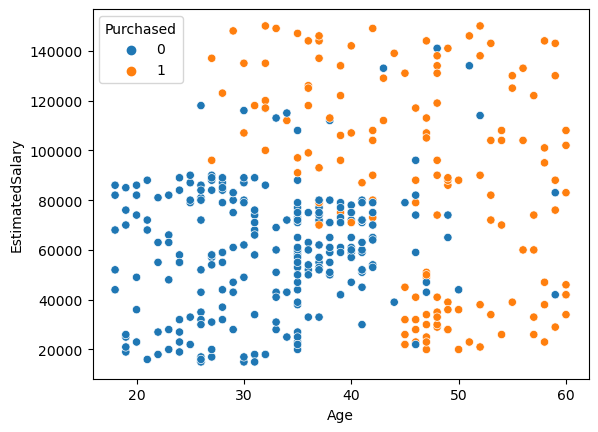

In [12]:
sns.scatterplot(x ="Age", y ="EstimatedSalary",data=df , hue="Purchased")

In [13]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
x = df.iloc[:,:-1]
y = df["Purchased"]

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train.shape

(320, 2)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
dt1 = DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
dt1.score(x_test,y_test)*100

83.75

In [24]:
dt.score(x_test,y_test)*100

83.75

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


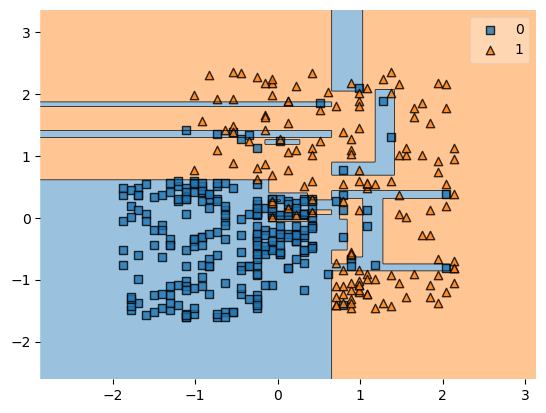

In [25]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt1)
plt.show()

In [26]:
dt.score(x_train,y_train)*100

99.6875

In [27]:
dt.predict([[19,19000]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [28]:
dt.predict([[35,20000]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [29]:
from sklearn.tree import plot_tree

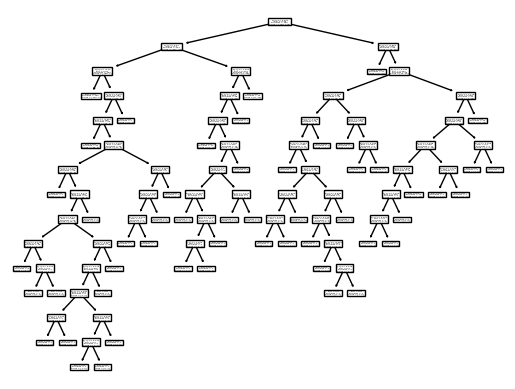

In [30]:
plot_tree(dt)
plt.show()

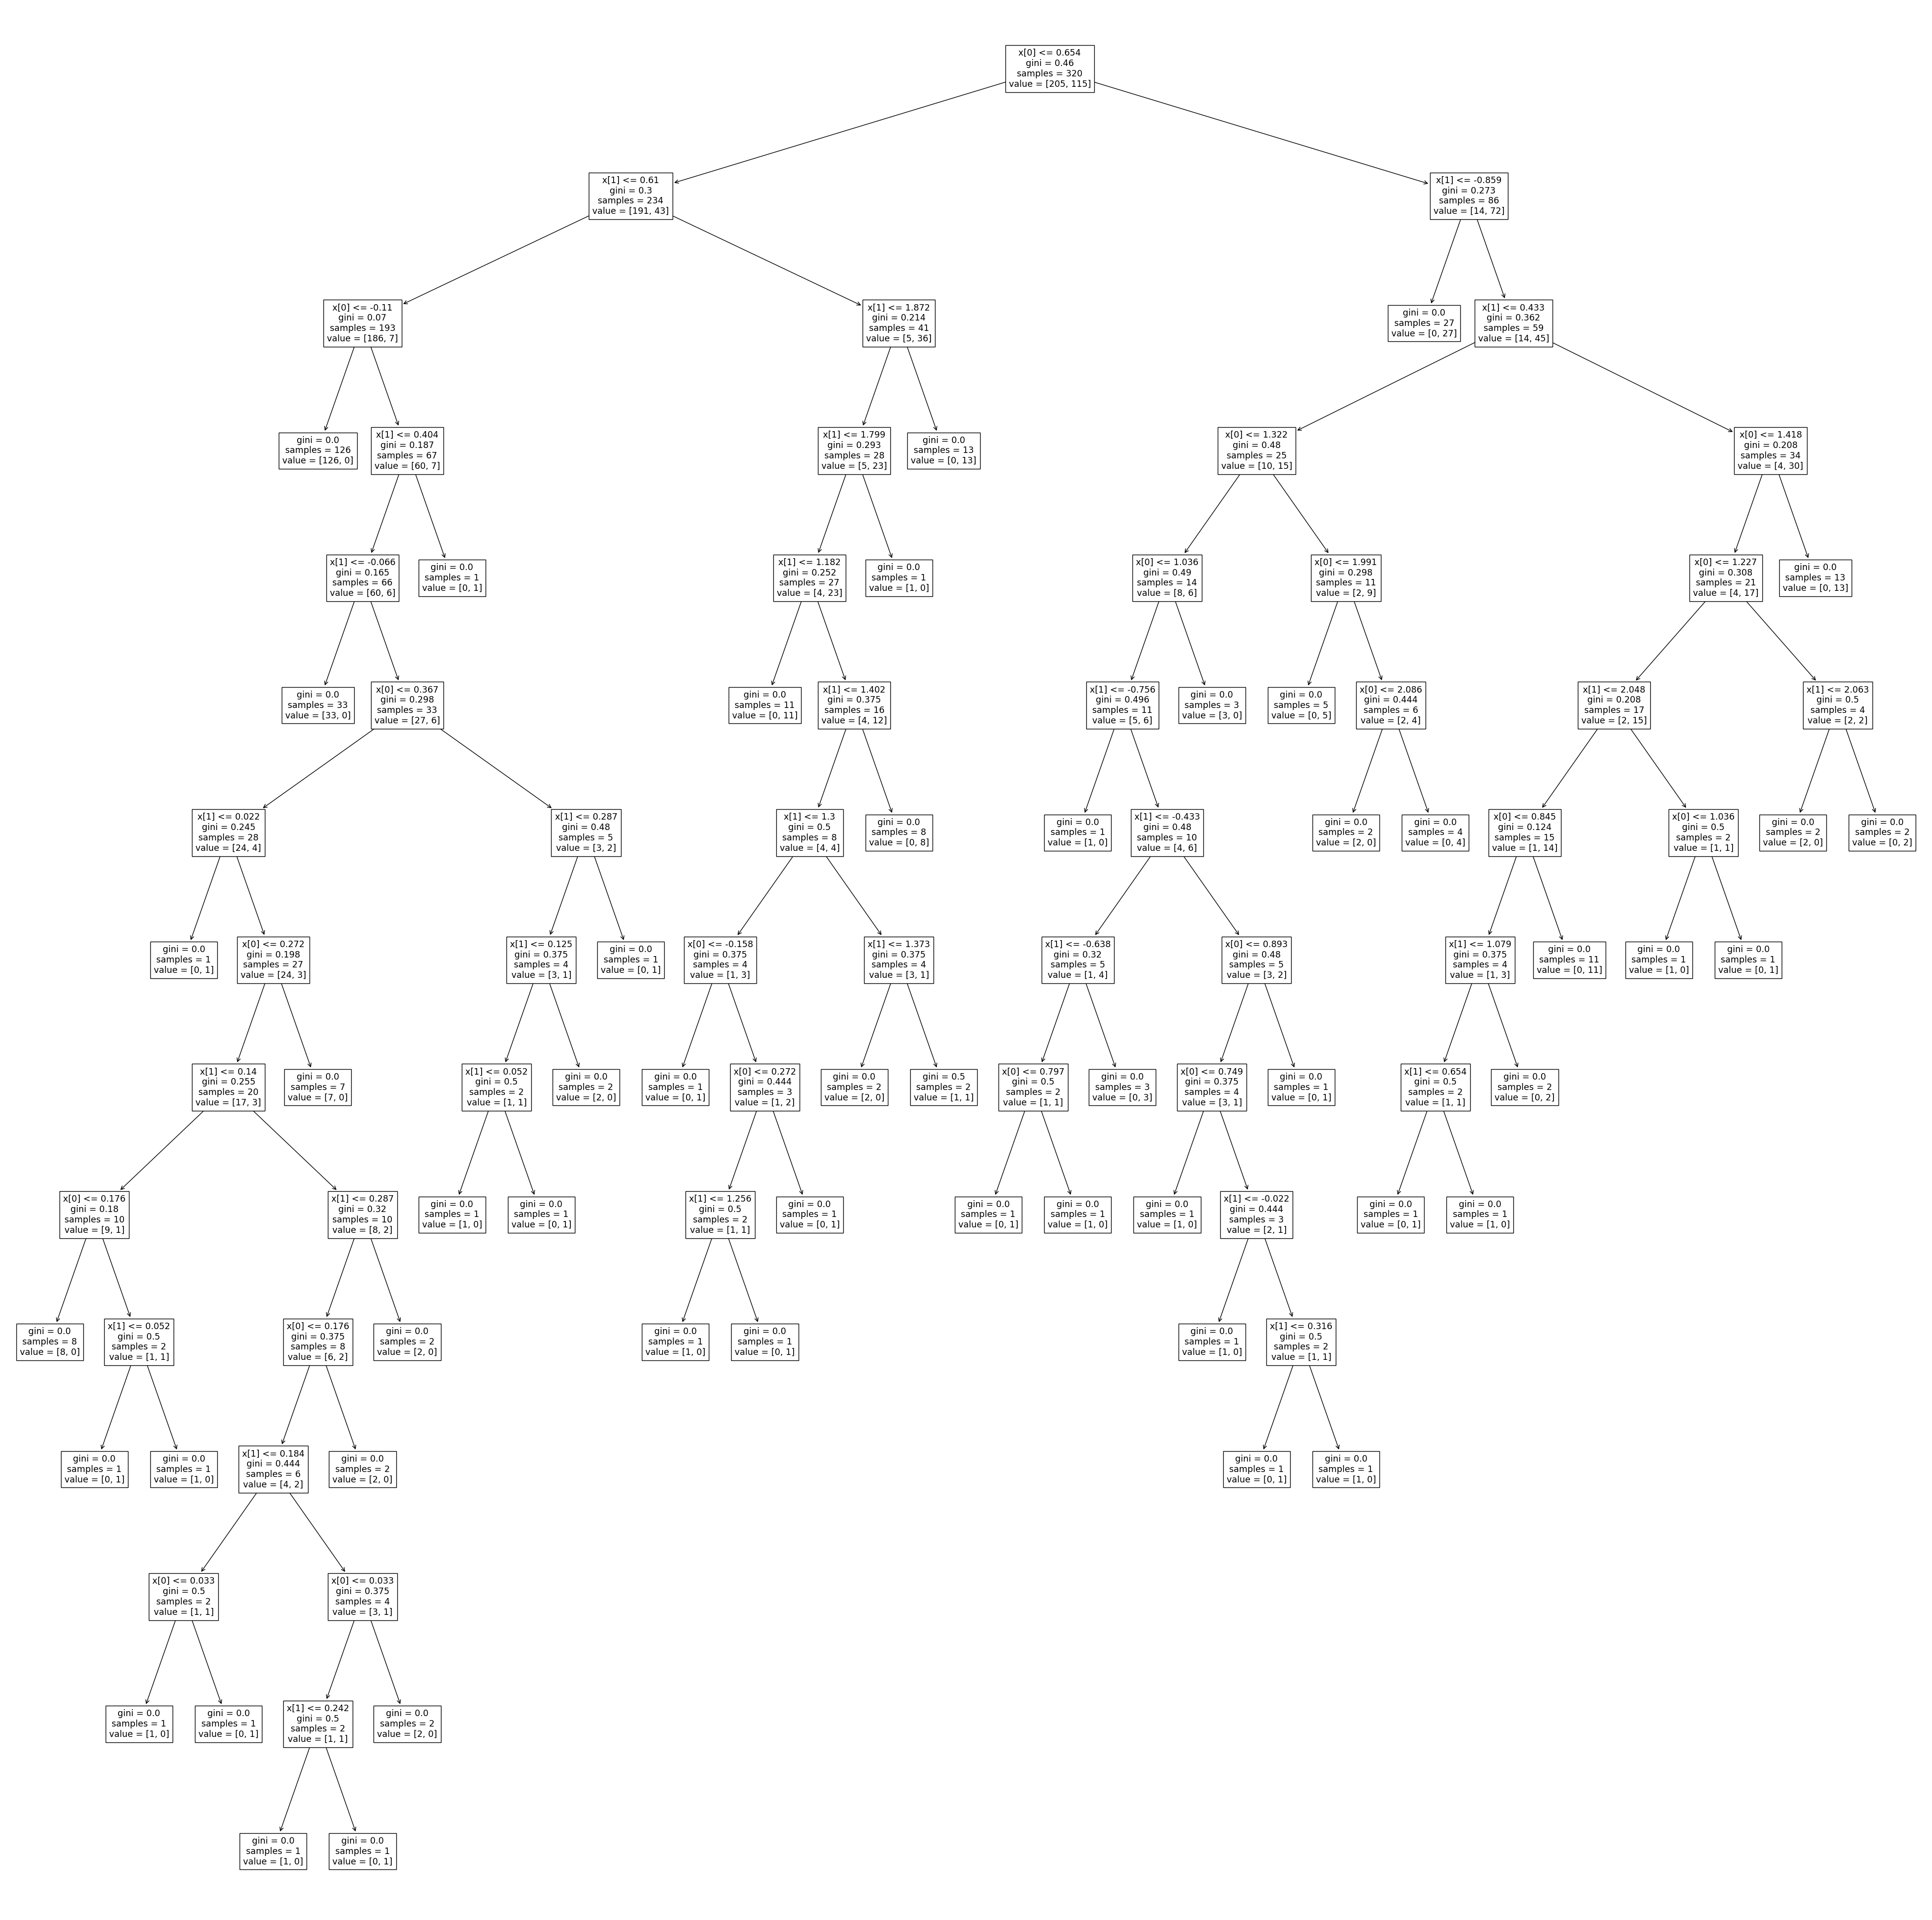

In [31]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("demo.jpg")
plt.show()

In [32]:
# PRE AND POST PRUNING(IN DECISION TREE)

In [33]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [40]:
dt.score(x_test,y_test)*100

90.0

In [41]:
dt.score(x_train,y_train)*100

93.4375

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


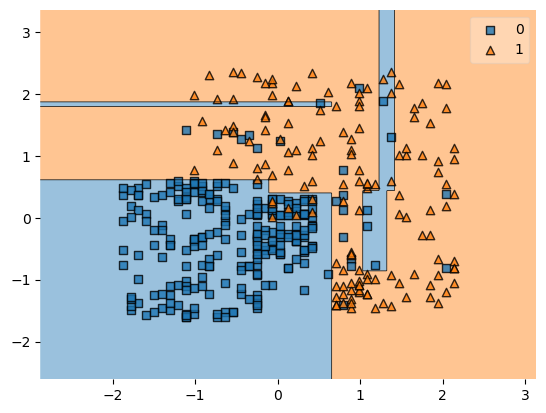

In [36]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

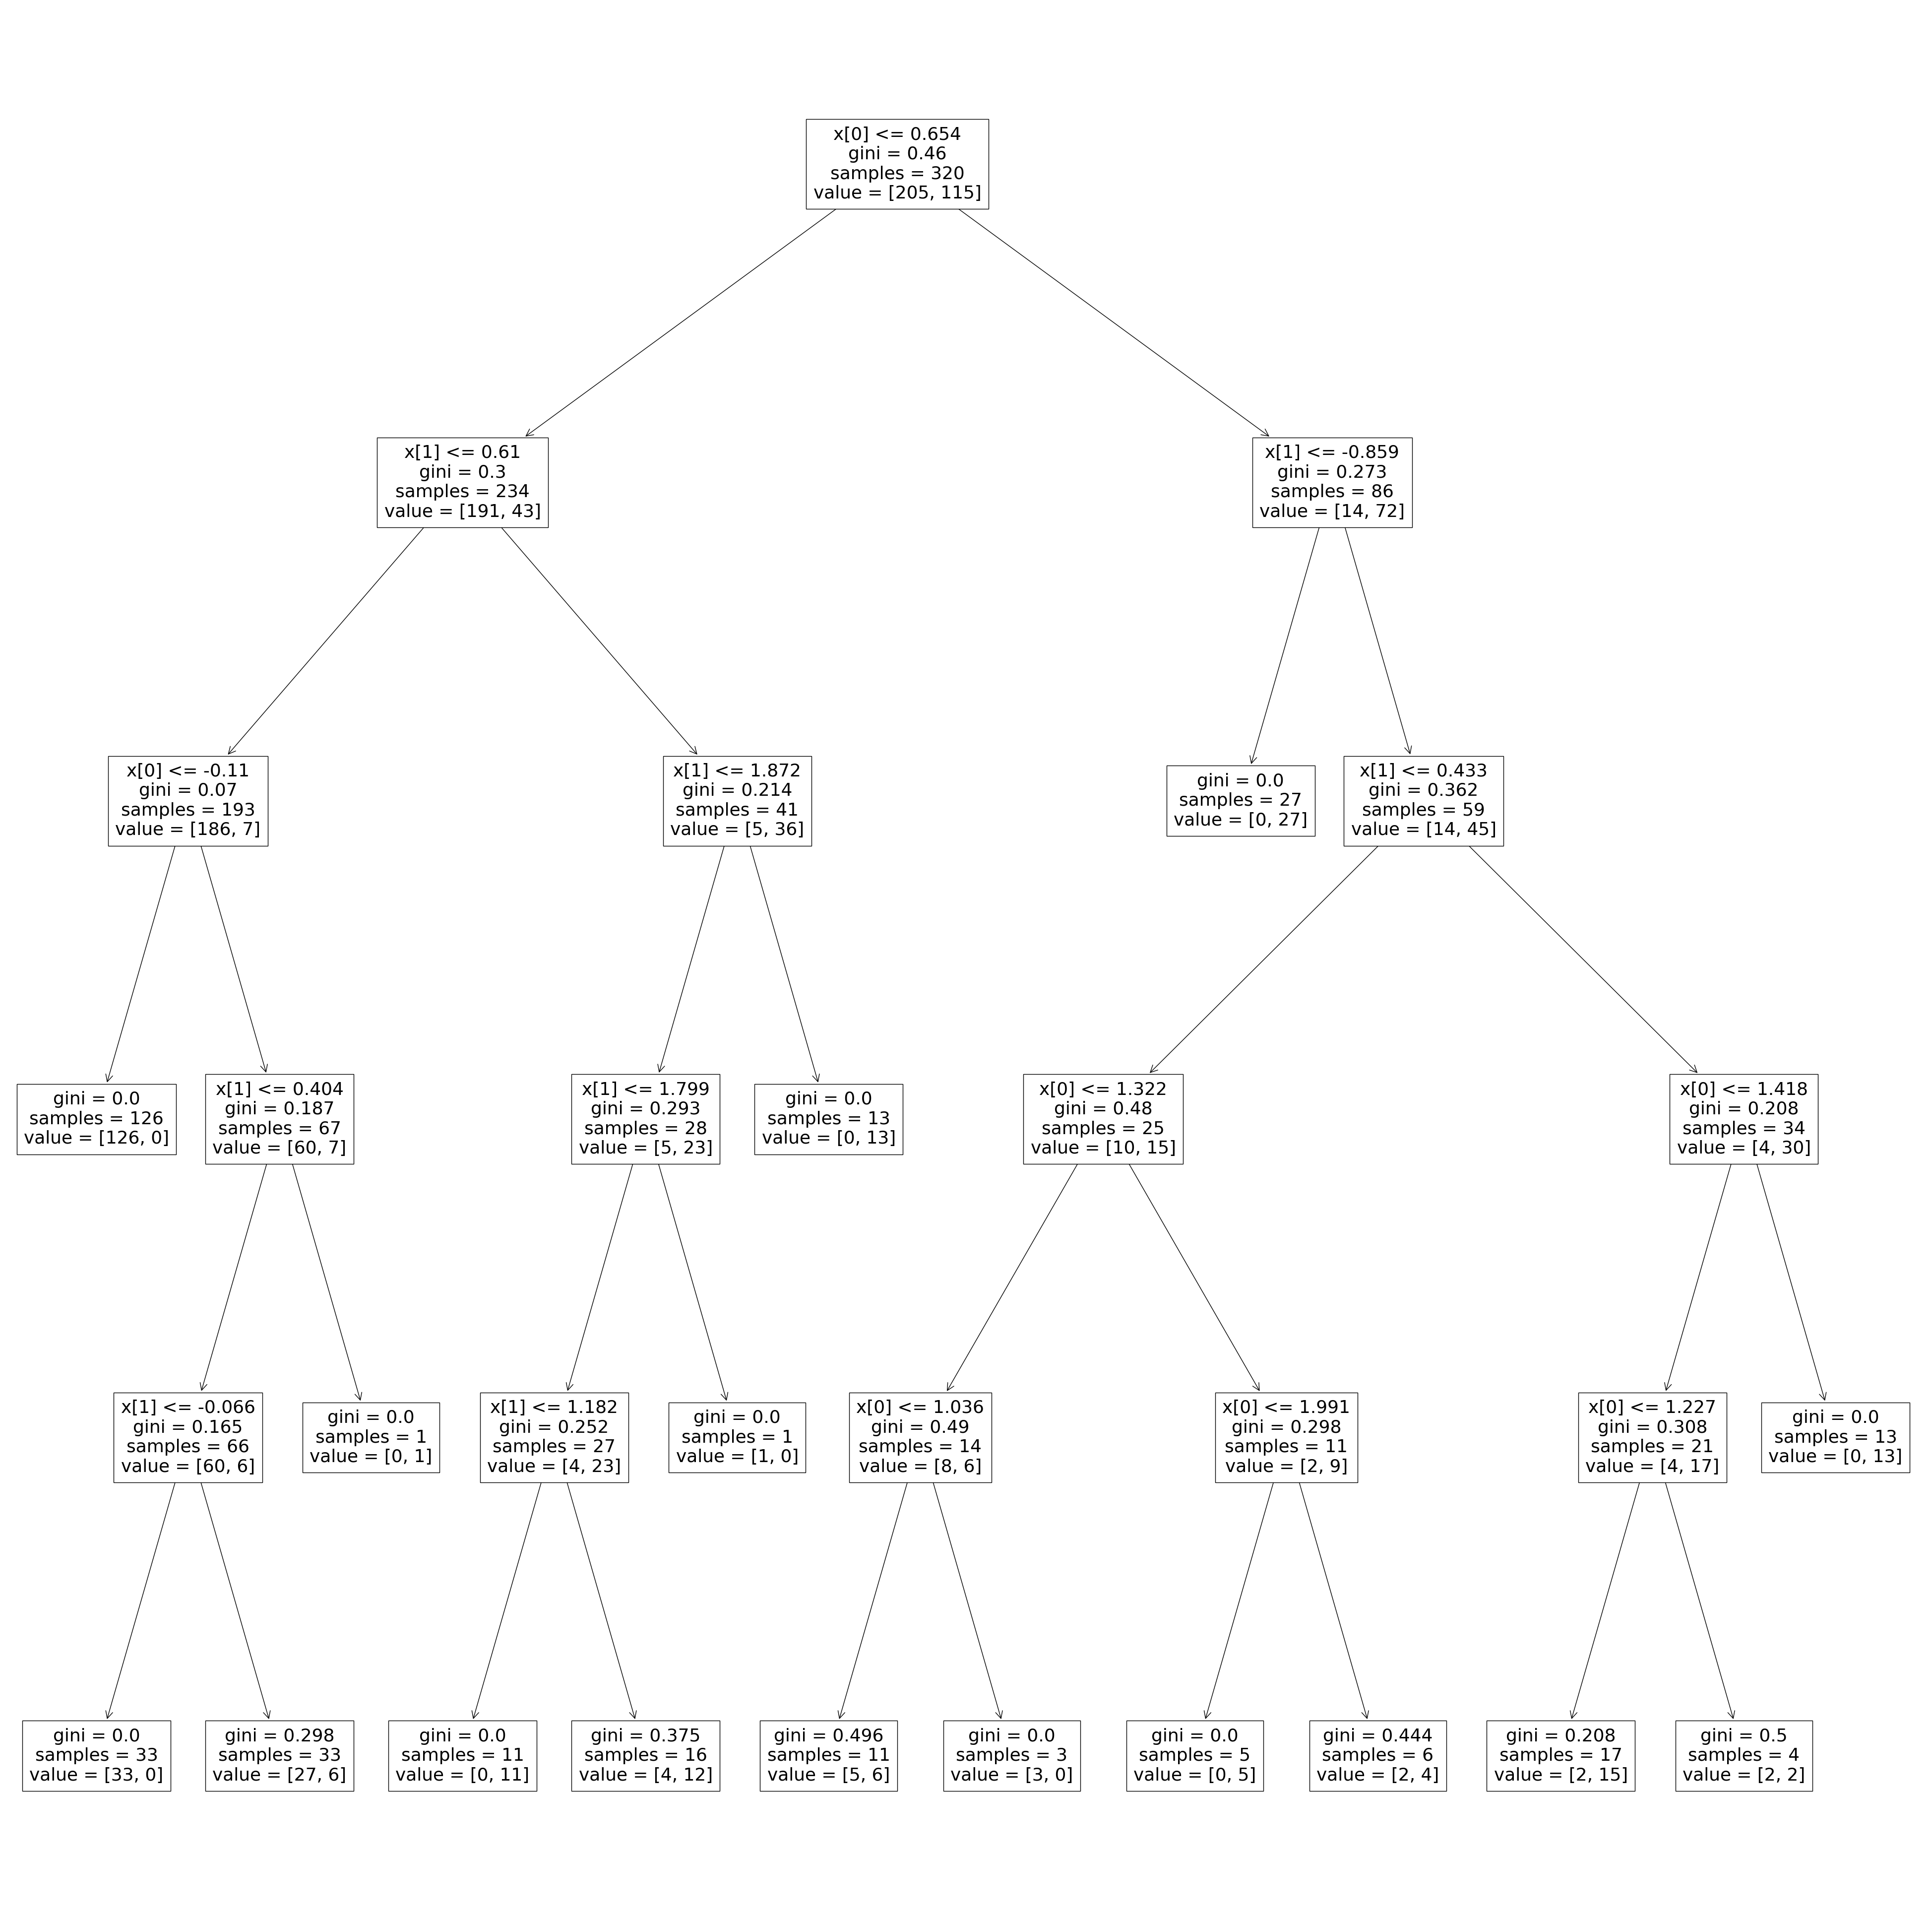

In [37]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("demo.jpg")
plt.show()

In [38]:
# POST PRUNING

In [39]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_features=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train),dt2.score(x_test,y_test),i)

0.996875 0.85 1
0.996875 0.8375 2
0.996875 0.8375 3
0.996875 0.8375 4
0.996875 0.8375 5
0.996875 0.8375 6
0.996875 0.8375 7
0.996875 0.8375 8
0.996875 0.8375 9
0.996875 0.8375 10
0.996875 0.8375 11
0.996875 0.8375 12
0.996875 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19


In [50]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [51]:
dt.score(x_test,y_test)*100

91.25

In [52]:
dt.score(x_train,y_train)*100

91.875

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


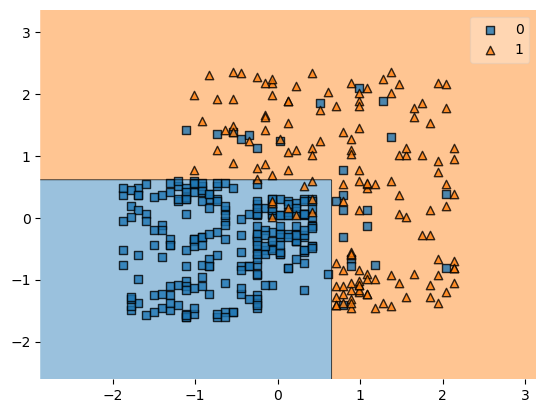

In [53]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

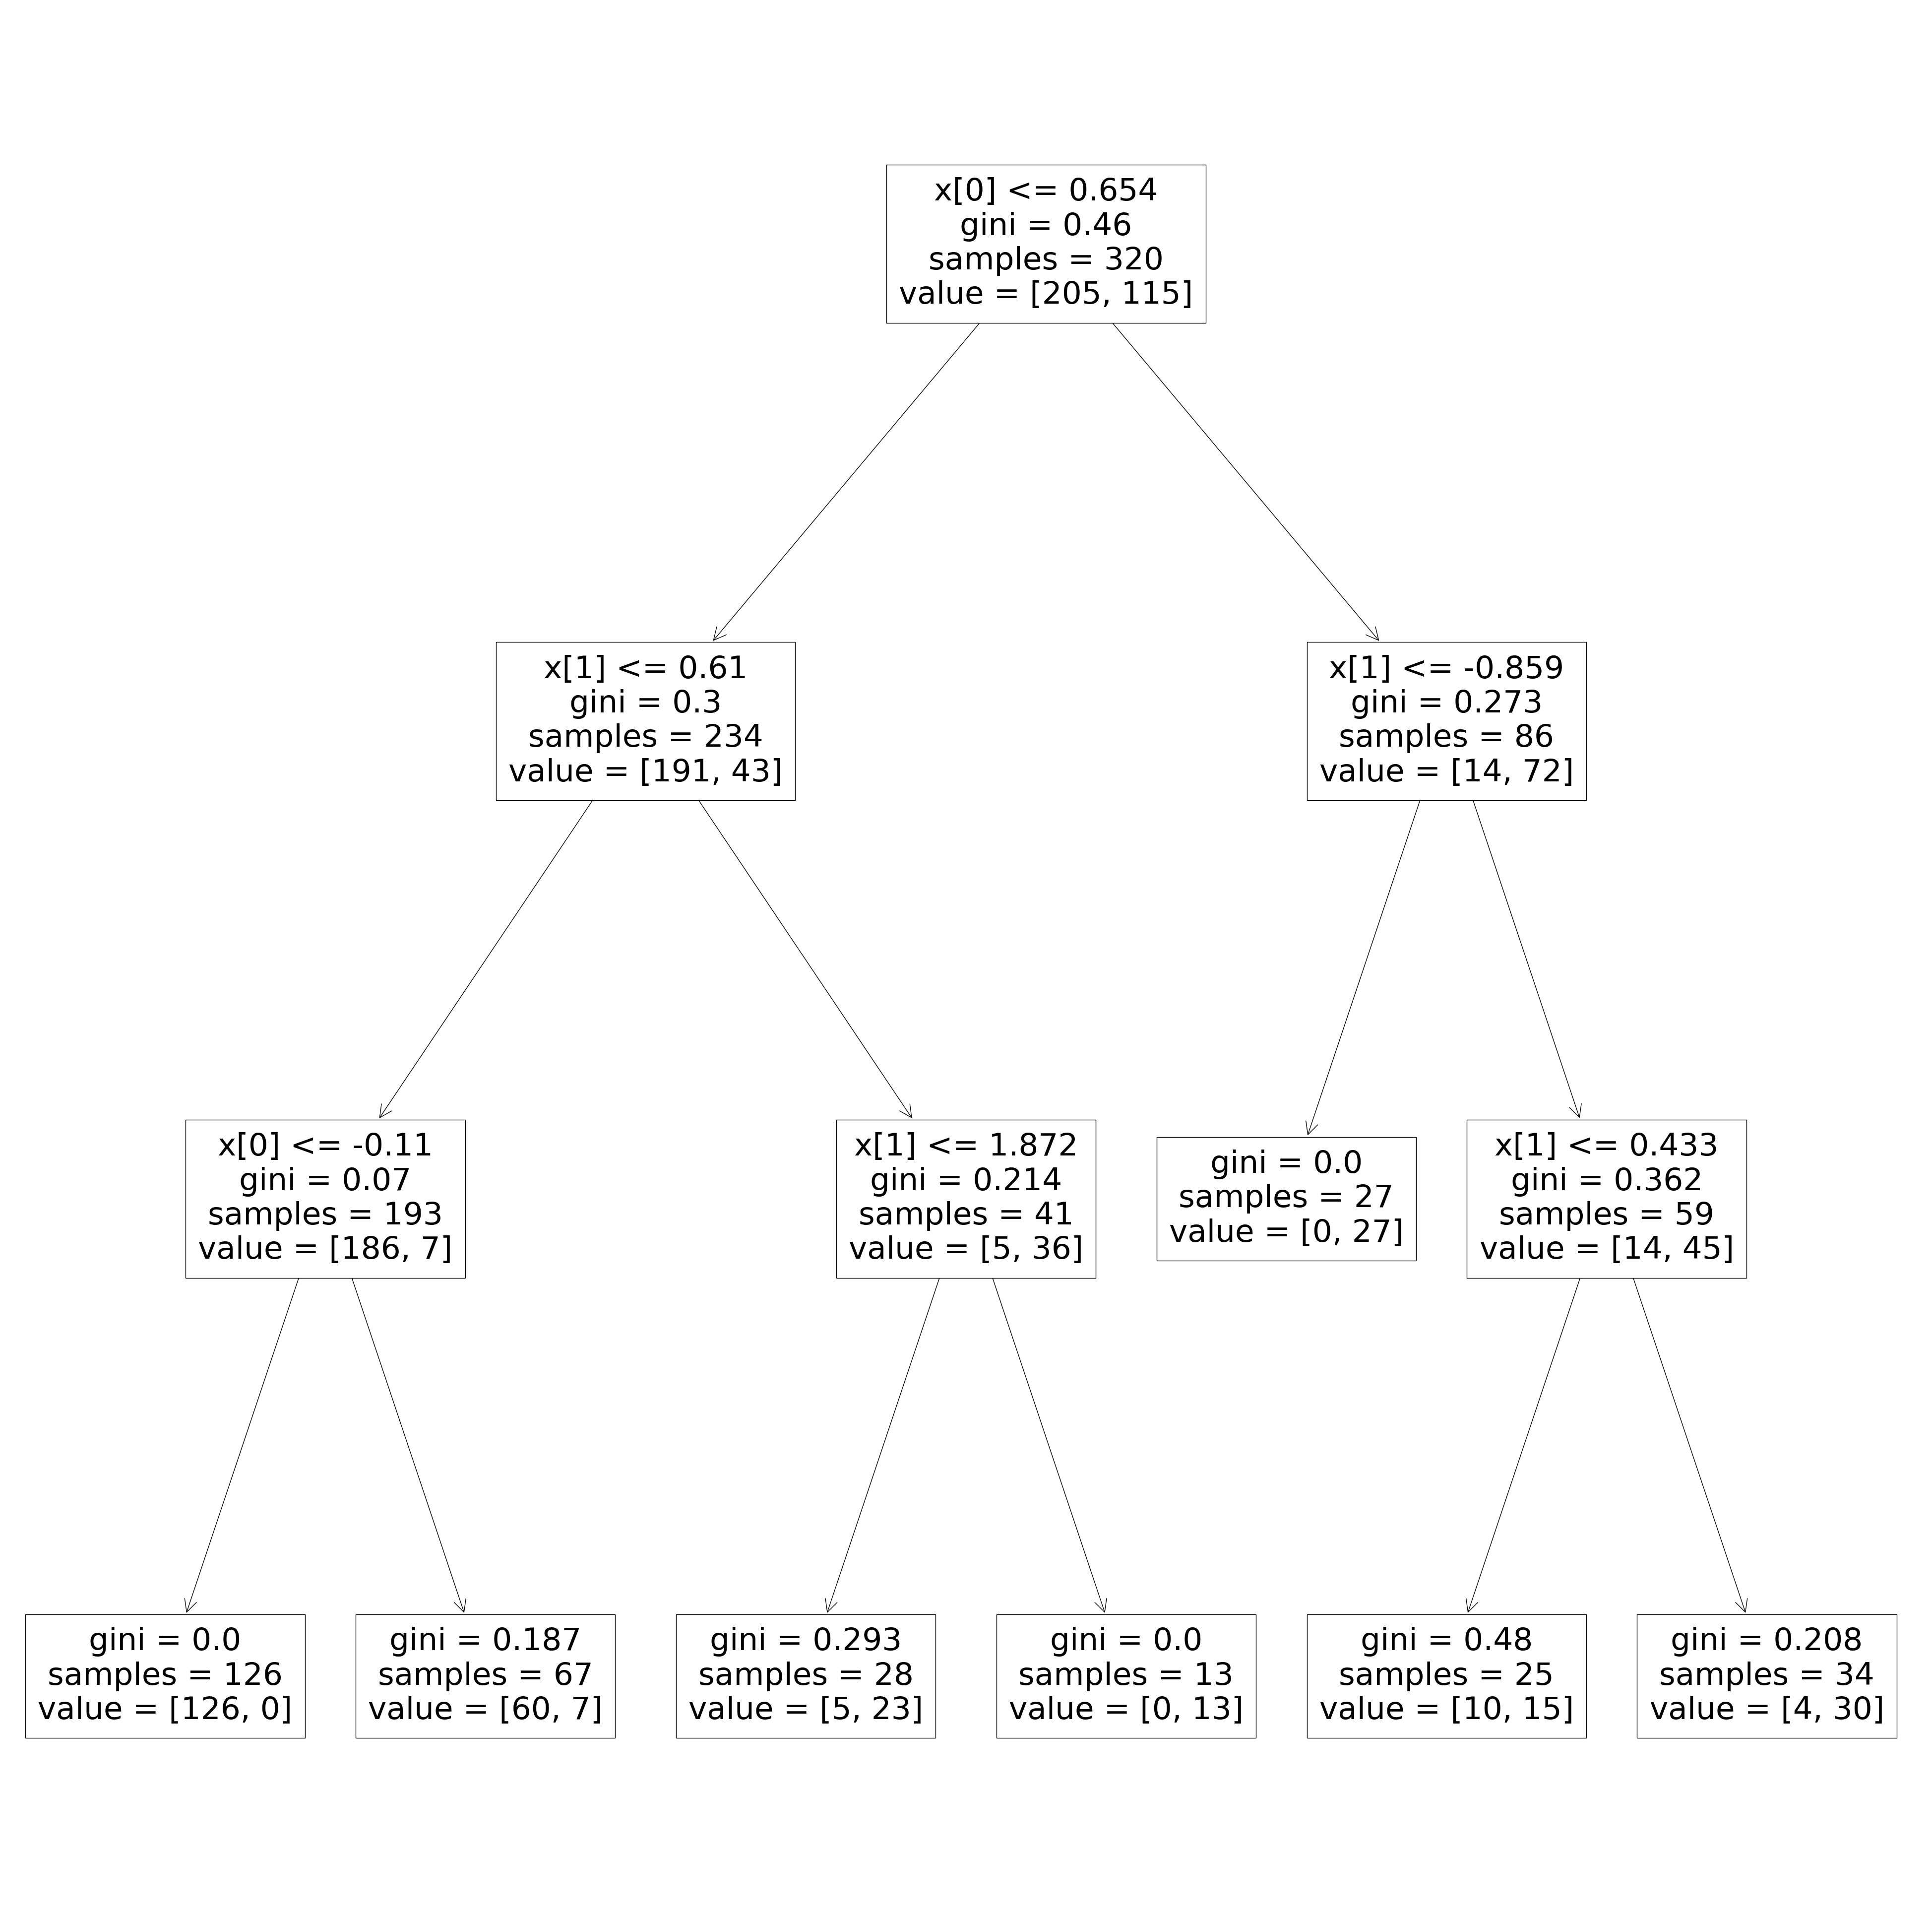

In [55]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("demo.jpg")
plt.show()